In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Global Power Plant Database

In [61]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [62]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [63]:
df.shape

(907, 27)

There are 907 rows and 27 columns in this database

In [64]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

There are many null values present in many columns.So, I will delete those columns which I think is not going to contribute for target label

In [65]:
df=df.drop(['country_long','other_fuel1','other_fuel2','other_fuel3','owner','url','wepp_id','generation_gwh_2013','generation_gwh_2019','generation_data_source','estimated_generation_gwh'
],axis=1)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 0 to 860
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          696 non-null    float64
 1   latitude             696 non-null    float64
 2   longitude            696 non-null    float64
 3   primary_fuel         696 non-null    int32  
 4   commissioning_year   696 non-null    float64
 5   source               696 non-null    int32  
 6   geolocation_source   696 non-null    int32  
 7   generation_gwh_2014  696 non-null    float64
 8   generation_gwh_2015  696 non-null    float64
 9   generation_gwh_2016  696 non-null    float64
dtypes: float64(7), int32(3)
memory usage: 67.8 KB


There are 7 flots and 3 int columns are present in this dataset

In [67]:
df.isnull().sum()

country                    0
name                       0
gppd_idnr                  0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       380
source                     0
geolocation_source        19
year_of_capacity_data    388
generation_gwh_2014      509
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
dtype: int64

Still there are some null values present in this dataset. So, remove those rows of latitude and longitude columns where null vales present

In [68]:
out = df.loc[df[['latitude','longitude']].isnull().any(1)].index.tolist()

In [69]:
df.drop(out,axis=0,inplace=True)

In [70]:
df.isnull().sum()

country                    0
name                       0
gppd_idnr                  0
capacity_mw                0
latitude                   0
longitude                  0
primary_fuel               0
commissioning_year       365
source                     0
geolocation_source         0
year_of_capacity_data    369
generation_gwh_2014      469
generation_gwh_2015      447
generation_gwh_2016      437
generation_gwh_2017      433
generation_gwh_2018      425
dtype: int64

In [71]:
df.shape

(861, 16)

In [72]:
#I will use the KNNImputer to fill the null values.
from sklearn.impute import KNNImputer

In [73]:
knnimp=KNNImputer(n_neighbors=100)

In [74]:
knn_imp=pd.DataFrame(knnimp.fit_transform(df[['capacity_mw','generation_gwh_2014']]))
df['generation_gwh_2014']=knn_imp[1]

In [75]:
knn_imp=pd.DataFrame(knnimp.fit_transform(df[['capacity_mw','generation_gwh_2015']]))
df['generation_gwh_2015']=knn_imp[1]

In [76]:
knn_imp=pd.DataFrame(knnimp.fit_transform(df[['capacity_mw','generation_gwh_2016']]))
df['generation_gwh_2016']=knn_imp[1]

In [77]:
knn_imp=pd.DataFrame(knnimp.fit_transform(df[['capacity_mw','generation_gwh_2017']]))
df['generation_gwh_2017']=knn_imp[1]

In [78]:
knn_imp=pd.DataFrame(knnimp.fit_transform(df[['capacity_mw','generation_gwh_2018']]))
df['generation_gwh_2018']=knn_imp[1]

In [79]:
knn_imp=pd.DataFrame(knnimp.fit_transform(df[['capacity_mw','commissioning_year']]))
df['commissioning_year']=knn_imp[1]

In [80]:
knn_imp=pd.DataFrame(knnimp.fit_transform(df[['capacity_mw','year_of_capacity_data']]))
df['year_of_capacity_data']=knn_imp[1]

In [81]:
df.head()

,country,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,IND,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.00,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2019.0,203.219278,176.130503,179.385899,180.983498,203.576562
1,IND,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,1992.54,Ultratech Cement ltd,WRI,2019.0,287.092167,251.010136,246.215816,258.414713,269.272587
2,IND,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,1986.49,CDM,WRI,2019.0,202.453526,176.130503,179.385899,179.453686,203.576562
3,IND,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.00,Central Electricity Authority,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,IND,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.00,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


Now, null values are fill with the help of KNNImputer technique.

In [82]:
df.isnull().sum()

country                   0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year       44
source                    0
geolocation_source        0
year_of_capacity_data    44
generation_gwh_2014      44
generation_gwh_2015      44
generation_gwh_2016      44
generation_gwh_2017      44
generation_gwh_2018      44
dtype: int64

After using KNNImputer there are still some null values in this dataset. I will find the rows of these null values and remove these rows.

In [84]:
null_value= df.loc[df[['commissioning_year','year_of_capacity_data','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']].isnull().any(1)].index.tolist()

In [85]:
df.drop(null_value,axis=0,inplace=True)

In [86]:
df.head()

,country,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,IND,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.00,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2019.0,203.219278,176.130503,179.385899,180.983498,203.576562
1,IND,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,1992.54,Ultratech Cement ltd,WRI,2019.0,287.092167,251.010136,246.215816,258.414713,269.272587
2,IND,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,1986.49,CDM,WRI,2019.0,202.453526,176.130503,179.385899,179.453686,203.576562
3,IND,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.00,Central Electricity Authority,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,IND,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.00,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [27]:
df.shape

(817, 16)

After removing the null value, now I have 817 rows and 16 columns

In [28]:
df.isnull().sum()

country                  0
name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
source                   0
geolocation_source       0
year_of_capacity_data    0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

In [29]:
#Checking the value counts of all the columns
for i in df.columns:
    print(df[i].value_counts(),('\n'))

IND    817
Name: country, dtype: int64 

ACME Solar Tower        1
PARE                    1
PALATANA CCPP           1
PALLIVASAL              1
PAMPORE GT              1
                       ..
JAISALMER GODAWARI      1
JALDHAKA I&II           1
JALLIPPA KAPURDI TPP    1
JAYKAYPURAM PLANT       1
URUMI                   1
Name: name, Length: 817, dtype: int64 

WRI1020239    1
IND0000540    1
IND0000317    1
IND0000318    1
IND0000319    1
             ..
WRI1019903    1
IND0000156    1
IND0000157    1
WRI1019889    1
IND0000488    1
Name: gppd_idnr, Length: 817, dtype: int64 

5.0       35
10.0      22
1200.0    19
20.0      18
1.0       18
          ..
2340.0     1
880.0      1
1100.0     1
855.0      1
480.0      1
Name: capacity_mw, Length: 339, dtype: int64 

19.0004    3
24.1917    3
24.8747    2
14.2133    2
11.5336    2
          ..
28.4849    1
11.5214    1
16.6208    1
22.4809    1
11.3727    1
Name: latitude, Length: 792, dtype: int64 

71.6917    4
71.6918    3
81.2875  

After checking the value counts of all the columns, I have found there are some columns which I think will not contribute to the target label and need to remove.

In [30]:
df=df.drop(['country','name','gppd_idnr','year_of_capacity_data'], axis=1)

In [31]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.00,National Renewable Energy Laboratory,National Renewable Energy Laboratory,203.219278,176.130503,179.385899,180.983498,203.576562
1,98.0,24.7663,74.6090,Coal,1992.54,Ultratech Cement ltd,WRI,287.092167,251.010136,246.215816,258.414713,269.272587
2,39.2,21.9038,69.3732,Wind,1986.49,CDM,WRI,202.453526,176.130503,179.385899,179.453686,203.576562
3,135.0,23.8712,91.3602,Gas,2004.00,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.00,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [32]:
for i in df.columns:
    print(df[i].value_counts(),('\n'))

5.0       35
10.0      22
1200.0    19
20.0      18
1.0       18
          ..
2340.0     1
880.0      1
1100.0     1
855.0      1
480.0      1
Name: capacity_mw, Length: 339, dtype: int64 

19.0004    3
24.1917    3
24.8747    2
14.2133    2
11.5336    2
          ..
28.4849    1
11.5214    1
16.6208    1
22.4809    1
11.3727    1
Name: latitude, Length: 792, dtype: int64 

71.6917    4
71.6918    3
81.2875    3
72.8983    3
75.8988    3
          ..
71.3236    1
73.0017    1
81.1698    1
81.1748    1
76.0584    1
Name: longitude, Length: 783, dtype: int64 

Coal       236
Hydro      226
Solar      119
Wind       101
Gas         62
Biomass     48
Oil         16
Nuclear      9
Name: primary_fuel, dtype: int64 

1986.87    222
2015.00     24
2013.00     23
2012.00     22
2010.00     18
          ... 
1993.38      1
2000.90      1
1987.03      1
2006.18      1
1986.83      1
Name: commissioning_year, Length: 125, dtype: int64 

Central Electricity Authority                469
CDM         

In [33]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000
mean,338.507558,21.337867,77.479838,1993.288862,1373.393798,1356.499879,1382.272408,1425.827724,1480.522433
std,589.521383,6.229479,5.024285,13.607571,3022.283001,3195.384545,3207.951720,3253.110341,3351.223896
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,16.917100,74.255300,1986.870000,203.219278,176.130503,179.385899,180.983498,203.576562
50%,60.000000,21.960300,76.655100,1988.000000,203.219278,176.130503,179.385899,184.533161,203.576562
75%,419.330000,25.784800,79.449400,2003.000000,1103.932600,896.863150,912.504550,920.129000,976.655000
max,4620.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


I can see ther are diffrences in 50% data and mean in some columns like capacity_mw, generation_gwh_2014, generation_gwh_2015,generation_gwh_2016, generation_gwh_2017,generation_gwh_2018.

It means there are outliers are present in this dataset.

Mean and std is also not proper in some columns i.e. capacity_mw,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018 

I will find the outliers present in this dataset by using distplot.

In [34]:
con=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        con.append(i)

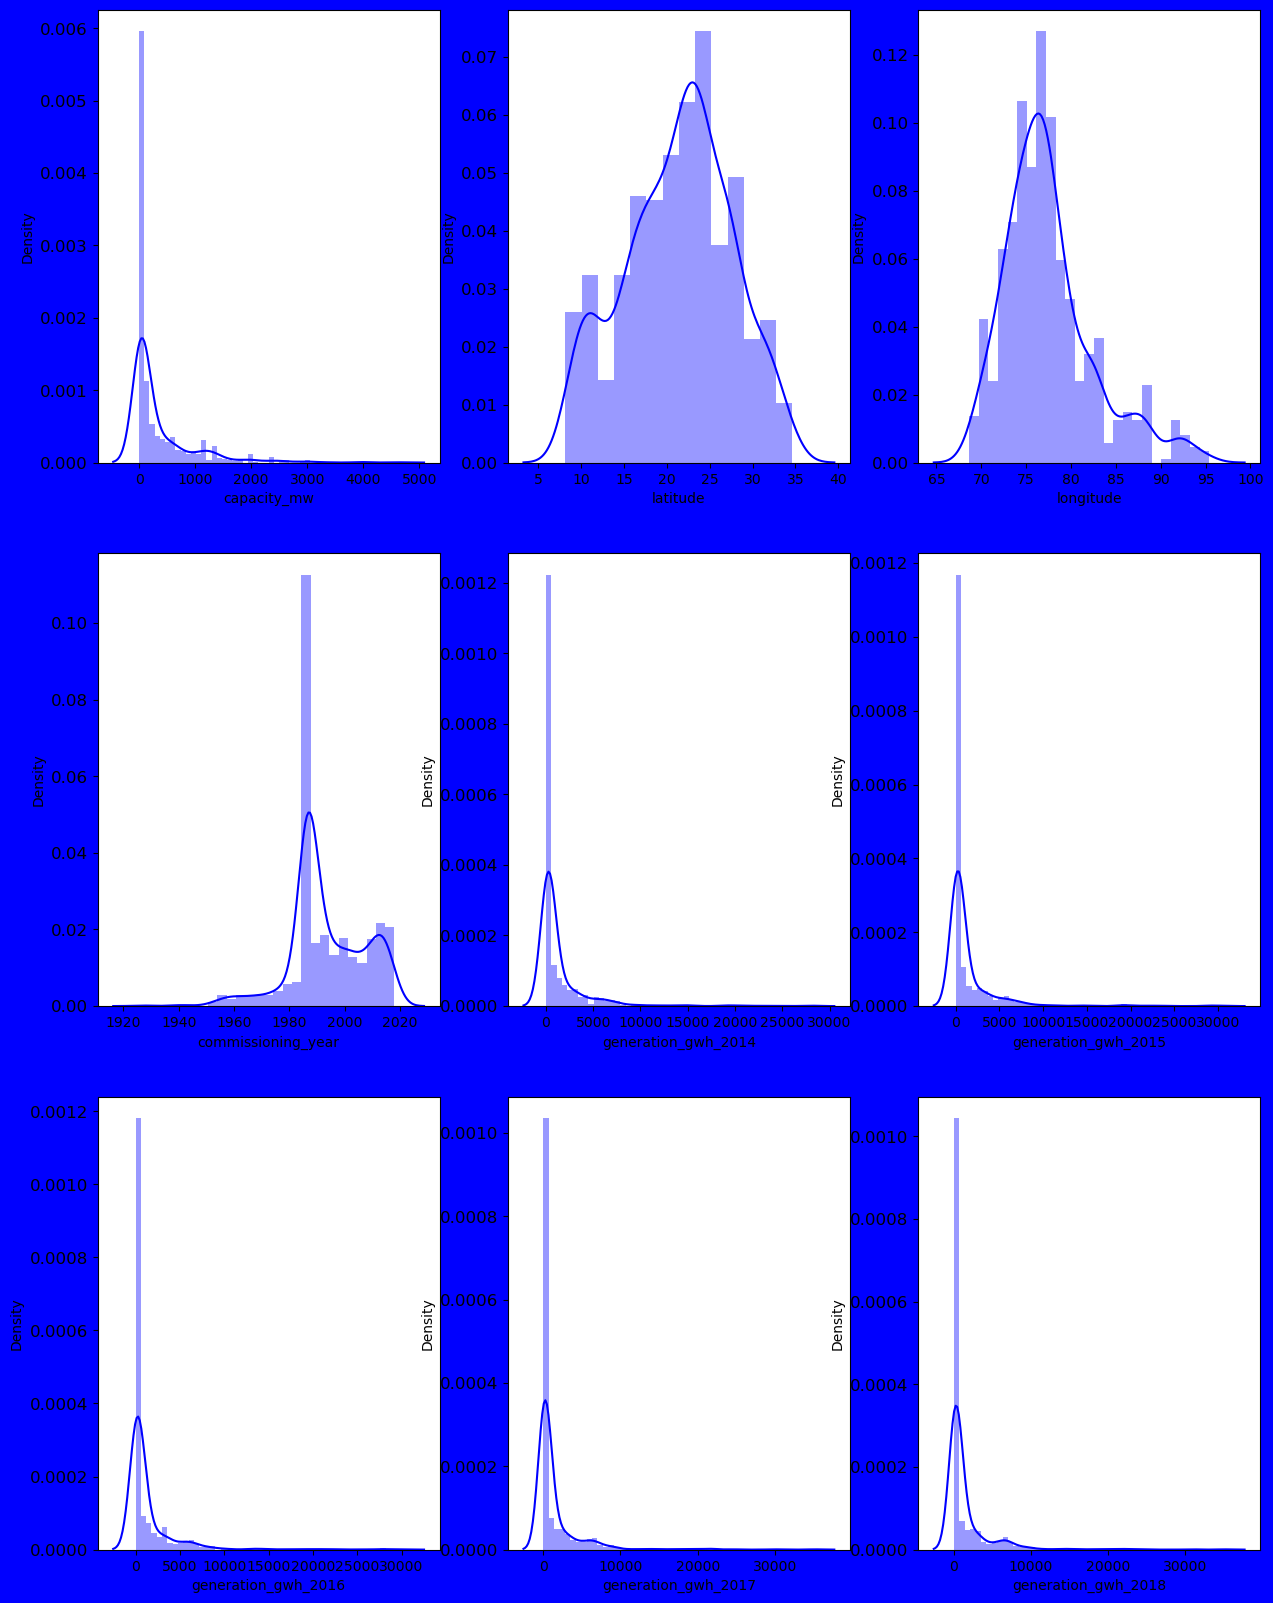

In [35]:
plt.figure(figsize=(15,20), facecolor='blue')
plotnumber=1

for i in df[con]:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[i], color='b')
        plt.xlabel(i, fontsize=10)
        plt.yticks(rotation=0, fontsize=12)
    plotnumber+=1
plt.show()

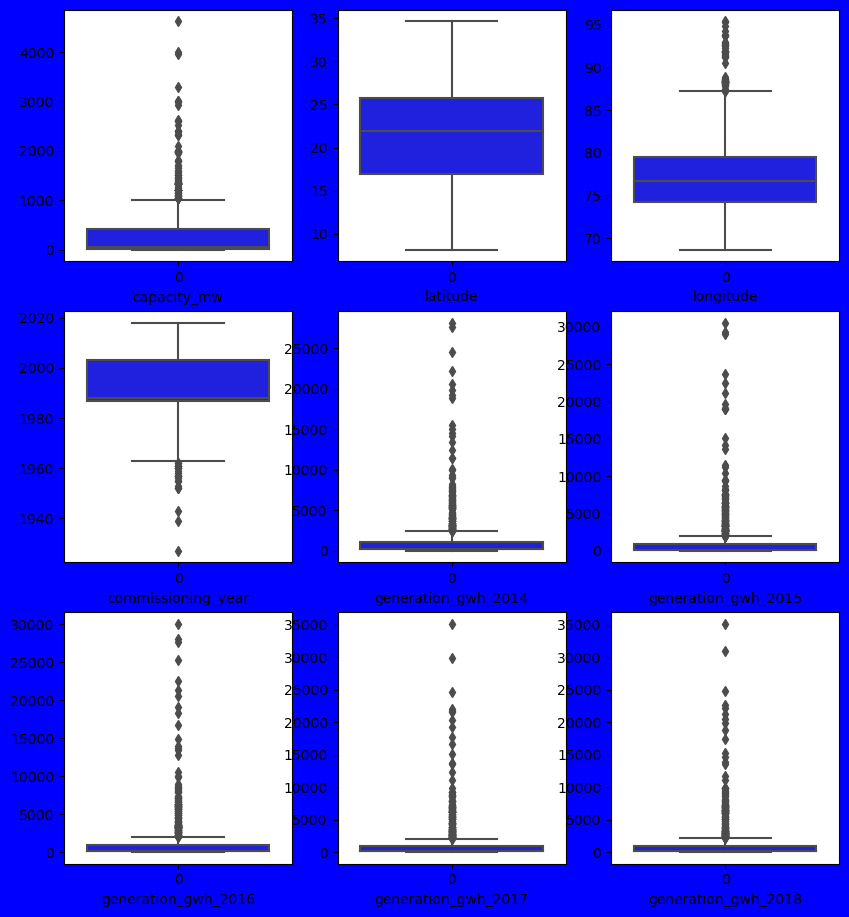

In [36]:
#Checking outliers in box plot also
plt.figure(figsize=(10,15), facecolor='blue')
plotnumber=1

for i in df[con]:
    if plotnumber<=13:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[i], color='b')
        plt.xlabel(i, fontsize=10)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.show()

In [37]:
#Using zscore technique to remove outliers from the dataset.
from scipy.stats import zscore
z_score=zscore(df[['capacity_mw', 'longitude', 'commissioning_year','generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']])
abs_z_score=np.abs(z_score)

In [38]:
filter_entry=(abs_z_score<2.2).all(axis=1)

In [39]:
df=df[filter_entry]

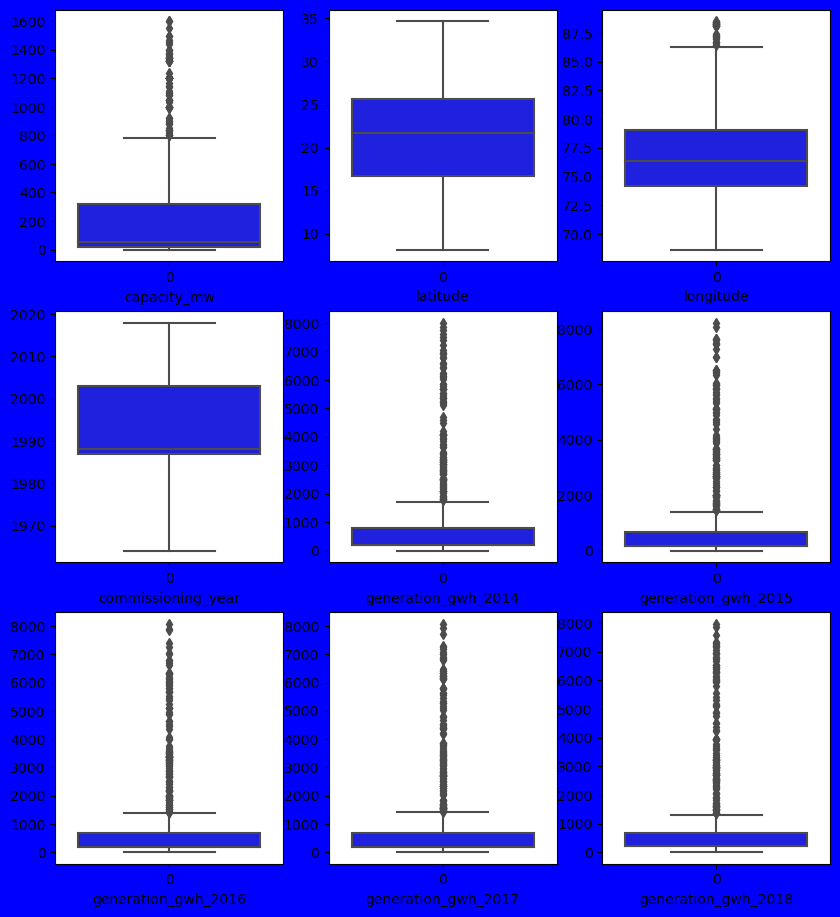

In [40]:
#Checking outliers in box plot also
plt.figure(figsize=(10,15), facecolor='blue')
plotnumber=1

for i in df[con]:
    if plotnumber<=13:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[i], color='b')
        plt.xlabel(i, fontsize=10)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.show()

In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [42]:
df1=le.fit_transform(df['primary_fuel'])
df['primary_fuel']=df1

In [43]:
df1=le.fit_transform(df['source'])
df['source']=df1

In [44]:
df1=le.fit_transform(df['geolocation_source'])
df['geolocation_source']=df1

In [45]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.00,97,1,203.219278,176.130503,179.385899,180.983498,203.576562
1,98.0,24.7663,74.6090,1,1992.54,157,2,287.092167,251.010136,246.215816,258.414713,269.272587
2,39.2,21.9038,69.3732,7,1986.49,19,2,202.453526,176.130503,179.385899,179.453686,203.576562
5,250.0,23.7689,68.6447,1,2005.00,20,2,1153.421000,1208.852000,1175.765000,1147.913000,976.655000
6,60.0,10.4547,77.0078,3,1970.00,20,2,157.558250,152.195200,61.421350,89.629600,48.327150


Extracting independent variable to check the multicollinearity issue.

To detect multicollinearity I will calculate the variance inflation factor (VIF) for each independent variable.

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [48]:
x=df.drop('primary_fuel',axis=1)
y=df.primary_fuel

In [101]:
x_scaled=scaler.fit_transform(x)

In [102]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor (x_scaled, i) for i in range(x_scaled.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,1.222792,capacity_mw
1,1.076882,latitude
2,1.167089,longitude
3,1.185467,commissioning_year
4,1.437169,source
5,1.484922,geolocation_source
6,5.546802,generation_gwh_2014
7,9.673412,generation_gwh_2015
8,11.806481,generation_gwh_2016
9,22.203827,generation_gwh_2017


In [103]:
df=df.drop(df[['generation_gwh_2017','generation_gwh_2018']], axis=1)

In [104]:
df.shape

(696, 10)

After removing columns which has higest multicollinearity issue I got 696 rows and 10 columns

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [106]:
etc=ExtraTreesClassifier()
rfc=RandomForestClassifier()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
lr=LogisticRegression()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()

In [110]:
mdl=[rfc,etc,lr,knn,dtc,gbc,abc,bc]

In [111]:
for i in range(1, 200):
    x_train, x_test, y_train, y_test=train_test_split(x_scaled, y, test_size=0.25, random_state=i)
    for i in mdl:
        i.fit(x_train, y_train)
        y_pred=i.predict(x_train)
        tacc=accuracy_score(y_train, y_pred)
        print('Accuracy Score of Train Data:',tacc*100)
        pred=i.predict(x_test)
        acc=accuracy_score(y_test, pred)
        print('Accuracy Score of Test Data:',acc*100)
        print('Model Name: ',i)
        print('\n')
    break

Accuracy Score of Train Data: 100.0
Accuracy Score of Test Data: 78.73563218390804
Model Name:  RandomForestClassifier()


Accuracy Score of Train Data: 100.0
Accuracy Score of Test Data: 75.28735632183908
Model Name:  ExtraTreesClassifier()


Accuracy Score of Train Data: 68.5823754789272
Accuracy Score of Test Data: 70.11494252873564
Model Name:  LogisticRegression()


Accuracy Score of Train Data: 76.4367816091954
Accuracy Score of Test Data: 67.81609195402298
Model Name:  KNeighborsClassifier()


Accuracy Score of Train Data: 100.0
Accuracy Score of Test Data: 70.6896551724138
Model Name:  DecisionTreeClassifier()


Accuracy Score of Train Data: 100.0
Accuracy Score of Test Data: 79.88505747126436
Model Name:  GradientBoostingClassifier()


Accuracy Score of Train Data: 57.662835249042146
Accuracy Score of Test Data: 53.44827586206896
Model Name:  AdaBoostClassifier()


Accuracy Score of Train Data: 99.61685823754789
Accuracy Score of Test Data: 79.88505747126436
Model Name:  Baggi

All model has given the best accuracy score.So, I will try to check CV score of all the models.

In [112]:
models={'RandomForestClassifier':rfc,'ExtraTreesClassifier':etc,'LogisticRegression':lr,'KNeighborsClassifier':knn,'DecisionTreeClassifier':dtc,'GradientBoostingClassifier':gbc,'AdaBoostClassifier':abc,'BaggingClassifier':bc}

In [113]:
#Cheking CV Score by using for loop on all models.
for i in mdl:
    score=cross_val_score(i, x_scaled,y)
    print('Model Name is :', i)
    print('Score: ',score)
    print('Score Mean: ',score.mean())
    for name, model in models.items():
        model.fit(x_train, y_train)
        ypred=model.predict(x_test)
    print("diffrent Between Accuracy Score and CV score is :" ,accuracy_score(y_test, ypred)-(score.mean()))
    print("\n")

Model Name is : RandomForestClassifier()
Score:  [0.80714286 0.85611511 0.82014388 0.76978417 0.79136691]
Score Mean:  0.8089105858170607
diffrent Between Accuracy Score and CV score is : -0.05028989616188828


Model Name is : ExtraTreesClassifier()
Score:  [0.75714286 0.79856115 0.79136691 0.77697842 0.76978417]
Score Mean:  0.7787667009249744
diffrent Between Accuracy Score and CV score is : -0.0029046319594571157


Model Name is : LogisticRegression()
Score:  [0.65       0.64748201 0.67625899 0.6618705  0.63309353]
Score Mean:  0.6537410071942447
diffrent Between Accuracy Score and CV score is : 0.13936244108161744


Model Name is : KNeighborsClassifier()
Score:  [0.56428571 0.69064748 0.65467626 0.69784173 0.65467626]
Score Mean:  0.6524254881808839
diffrent Between Accuracy Score and CV score is : 0.14067796009497824


Model Name is : DecisionTreeClassifier()
Score:  [0.75714286 0.79856115 0.83453237 0.72661871 0.68345324]
Score Mean:  0.7600616649537513
diffrent Between Accuracy 

RandomForestClassifier has given the best CV Score. So, I will hypertune this model and chcek the accuracy score.

In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
param={'n_estimators': [10,15],
       'max_depth':[10,15,20],
      'max_features':['auto', 'sqrt', 'log2'],
      'criterion' :['gini', 'entropy']}

In [117]:
grd=GridSearchCV(rfc, param_grid=param)

In [118]:
grd.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 15]})

In [119]:
grd.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'auto',
 'n_estimators': 15}

In [120]:
final_model=RandomForestClassifier(criterion='entropy', max_depth=15,n_estimators=15,max_features='auto')

In [121]:
final_model.fit(x_train, y_train)
pred=final_model.predict(x_test)
accuracy_score(y_test, pred)

0.7873563218390804

Final Model Score is 79%

# Now I am building the model to predict 'capacity_mw' 

In [87]:
con=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        con.append(i)

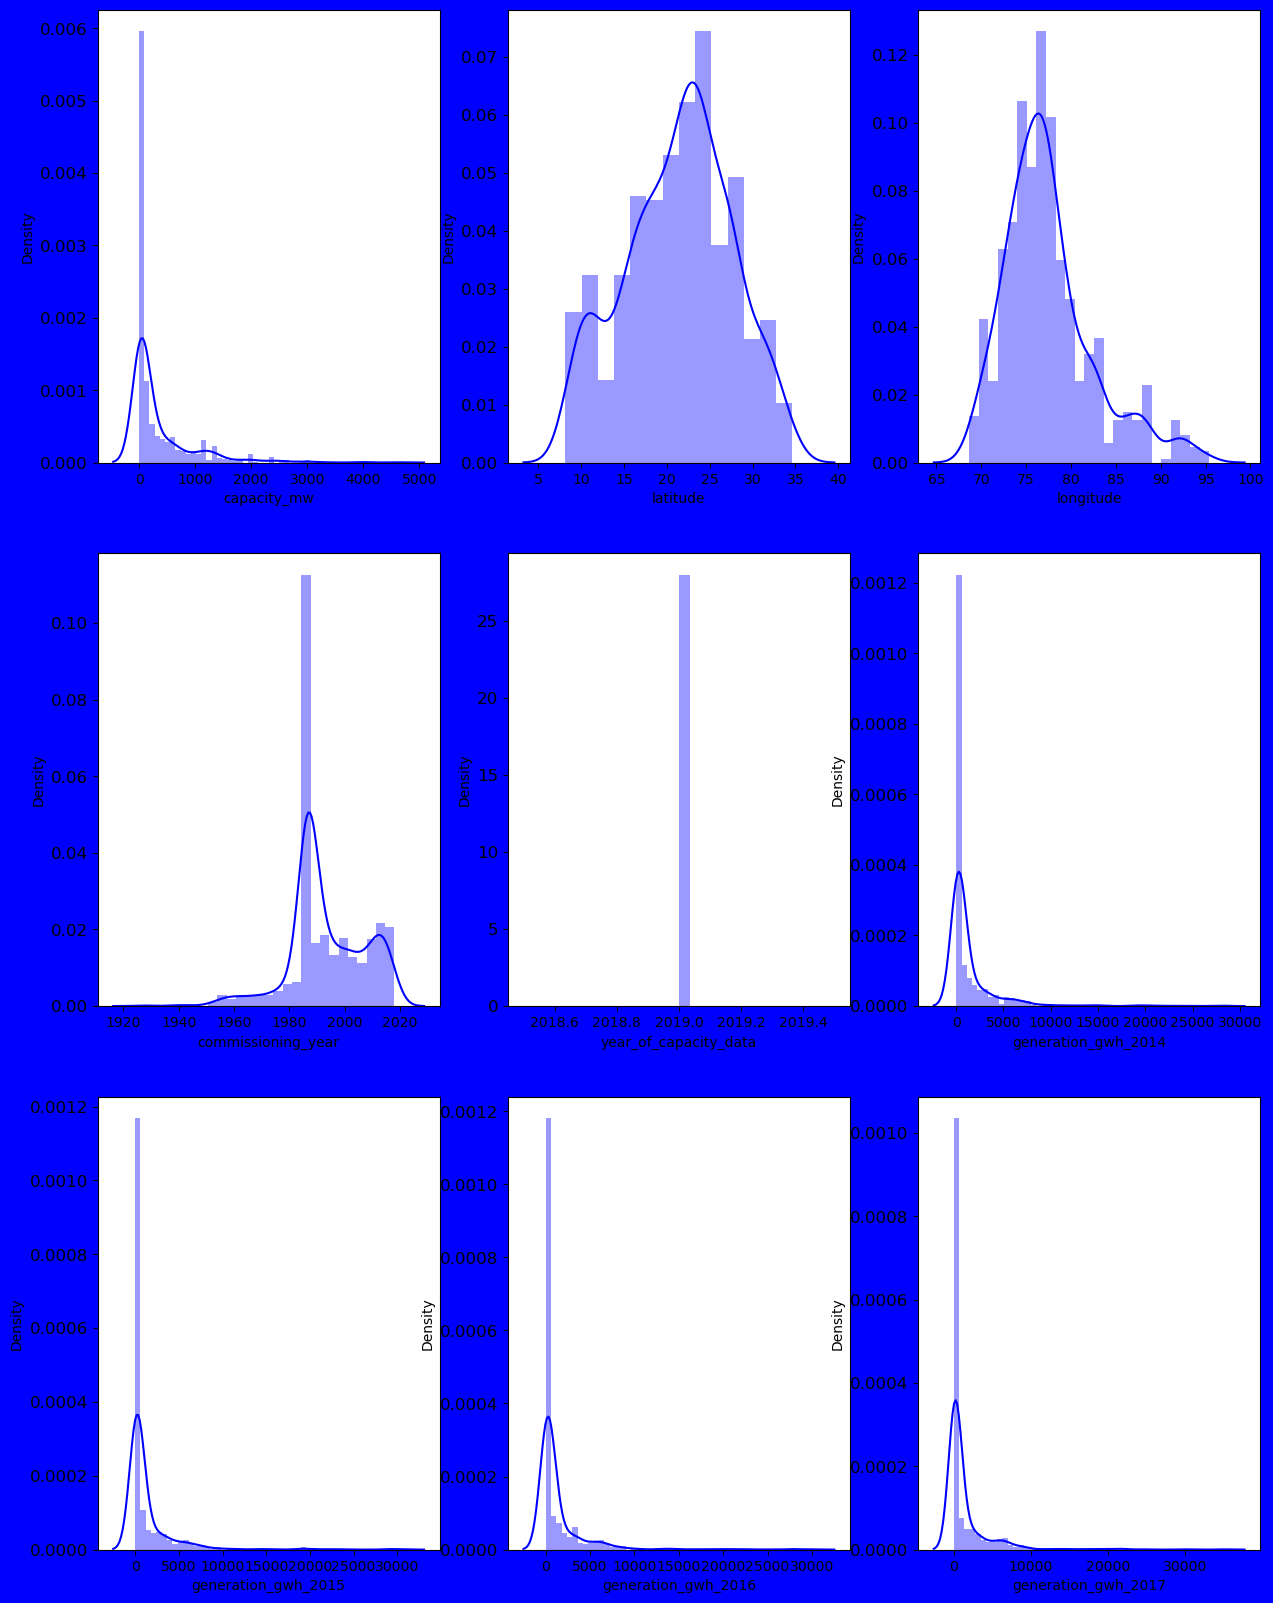

In [88]:
#Checking outliers by using Dist Plot
plt.figure(figsize=(15,20), facecolor='blue')
plotnumber=1

for i in df[con]:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[i], color='b')
        plt.xlabel(i, fontsize=10)
        plt.yticks(rotation=0, fontsize=12)
    plotnumber+=1
plt.show()

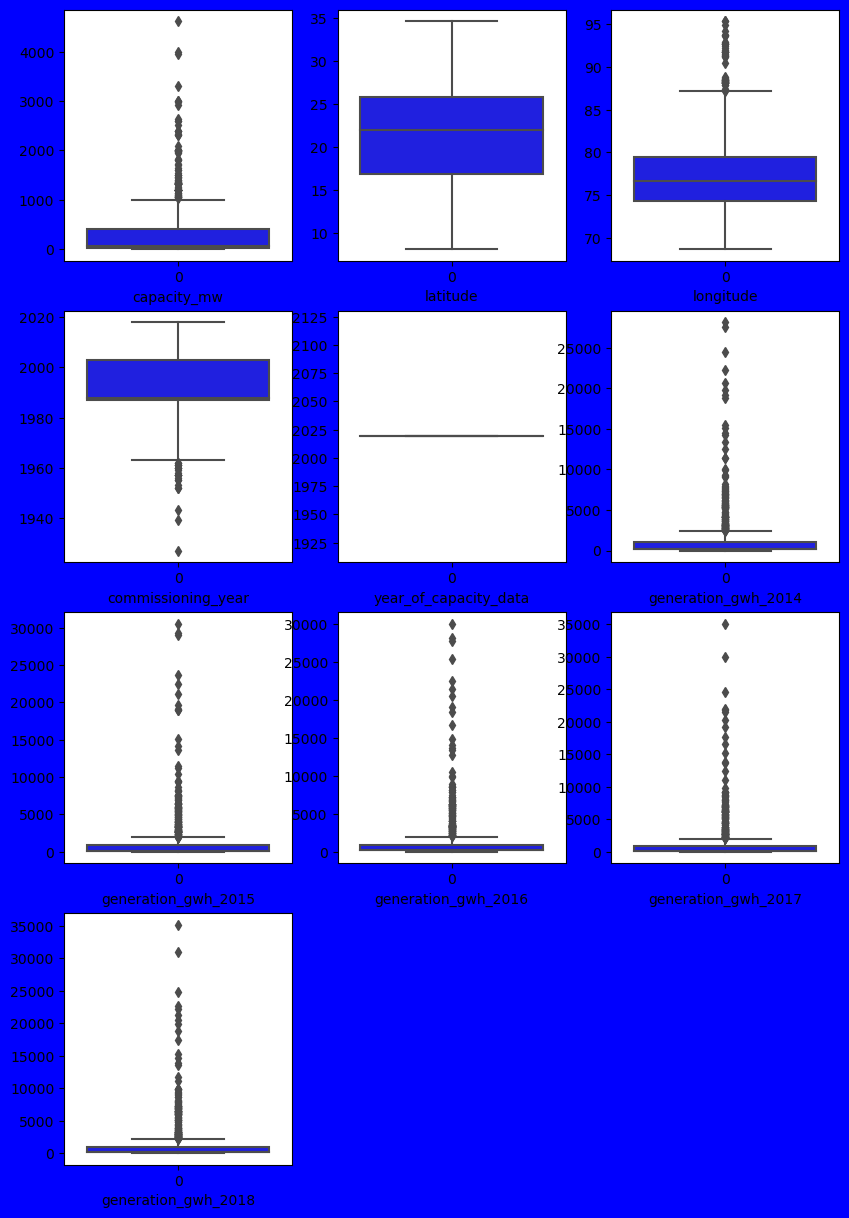

In [89]:
#Checking outliers in box plot also
plt.figure(figsize=(10,15), facecolor='blue')
plotnumber=1

for i in df[con]:
    if plotnumber<=13:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[i], color='b')
        plt.xlabel(i, fontsize=10)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.show()

In [ ]:
#Using zscore technique to remove outliers from the dataset.
from scipy.stats import zscore
z_score=zscore(df[['longitude', 'commissioning_year','generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']])
abs_z_score=np.abs(z_score)

In [90]:
filter_entry=(abs_z_score<2.2).all(axis=1)

In [91]:
df=df[filter_entry]

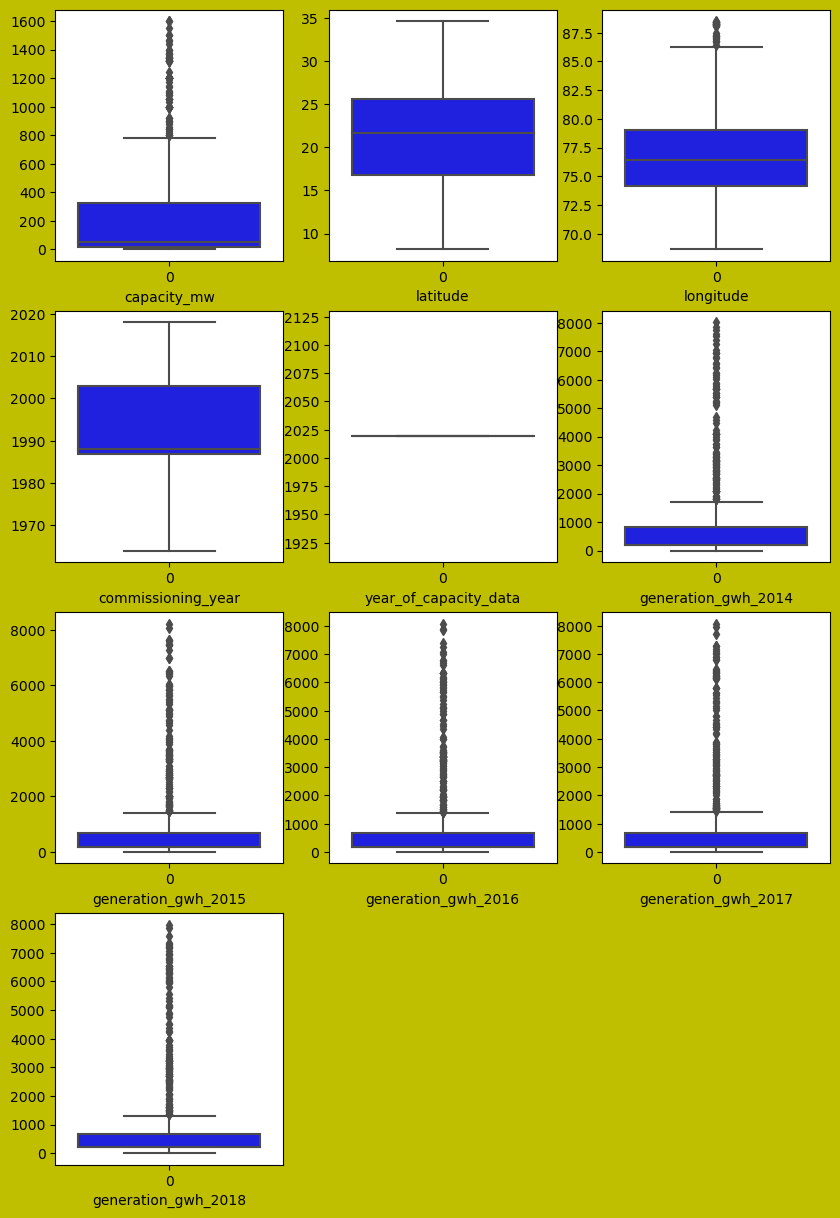

In [92]:
#Checking outliers in box plot again to cross check.
plt.figure(figsize=(10,15), facecolor='y')
plotnumber=1

for i in df[con]:
    if plotnumber<=13:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[i], color='b')
        plt.xlabel(i, fontsize=10)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.show()

In [93]:
#Converting categorical data to continueus data by using Label Encoder.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [94]:
df1=le.fit_transform(df['primary_fuel'])
df['primary_fuel']=df1

In [95]:
df1=le.fit_transform(df['source'])
df['source']=df1

In [96]:
df1=le.fit_transform(df['geolocation_source'])
df['geolocation_source']=df1

In [97]:
df.head()

,country,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,IND,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,6,2011.00,97,1,2019.0,203.219278,176.130503,179.385899,180.983498,203.576562
1,IND,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,1,1992.54,157,2,2019.0,287.092167,251.010136,246.215816,258.414713,269.272587
2,IND,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,7,1986.49,19,2,2019.0,202.453526,176.130503,179.385899,179.453686,203.576562
5,IND,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,1,2005.00,20,2,2019.0,1153.421000,1208.852000,1175.765000,1147.913000,976.655000
6,IND,ALIYAR,IND0000004,60.0,10.4547,77.0078,3,1970.00,20,2,2019.0,157.558250,152.195200,61.421350,89.629600,48.327150


In [105]:
#Removing Unnessary columns from Dataset.
df=df.drop(['country','name','gppd_idnr','year_of_capacity_data'],axis=1)

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [106]:
#Seperating independent variable and dependent variable.
x1=df.drop('capacity_mw',axis=1)
y1=df.capacity_mw

In [107]:
x_scaled=scaler.fit_transform(x1)

In [108]:
#To detect multicollinearity I will calculate the variance inflation factor (VIF) for each independent variable.
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor (x_scaled, i) for i in range(x_scaled.shape[1])]
vif['feature']=x1.columns
vif

,vif,feature
0,1.074916,latitude
1,1.304054,longitude
2,1.801206,primary_fuel
3,1.185661,commissioning_year
4,1.592049,source
5,2.147833,geolocation_source
6,5.546079,generation_gwh_2014
7,9.665703,generation_gwh_2015
8,11.799753,generation_gwh_2016
9,22.190553,generation_gwh_2017


In [109]:
df=df.drop(df[['generation_gwh_2017','generation_gwh_2018']], axis=1)

In [110]:
df.shape

(696, 10)

In [111]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [112]:
lr=LinearRegression()
rfr=RandomForestRegressor()
dtr=DecisionTreeRegressor()
knn=KNN()
ls=Lasso()
rd=Ridge()
etr=ExtraTreesRegressor()
svr=SVR()
gdr=GradientBoostingRegressor()

In [113]:
mdl=[lr,rfr,dtr,knn,ls,rd,etr,svr,gdr]

In [114]:
for i in range(1, 200):
    x_train, x_test, y_train, y_test=tts(x_scaled, y1, test_size=0.25, random_state=i)
    for i in mdl:
        i.fit(x_train, y_train)
        y_pred=i.predict(x_train)
        tacc=r2_score(y_train, y_pred)
        print('r2_score of Train Data:',tacc*100)
        pred=i.predict(x_test)
        acc=r2_score(y_test, pred)
        print('r2_score of Test Data:',acc*100)
        print('Model Name: ',i)
        print('\n')
    break

r2_score of Train Data: 29.501234467613735
r2_score of Test Data: 23.045265604418162
Model Name:  LinearRegression()


r2_score of Train Data: 92.96501666091991
r2_score of Test Data: 43.875535481149996
Model Name:  RandomForestRegressor()


r2_score of Train Data: 99.99959052652945
r2_score of Test Data: 21.319691796756292
Model Name:  DecisionTreeRegressor()


r2_score of Train Data: 52.49383121521011
r2_score of Test Data: 23.52250047958726
Model Name:  KNeighborsRegressor()


r2_score of Train Data: 29.454295688599462
r2_score of Test Data: 22.95570954743633
Model Name:  Lasso()


r2_score of Train Data: 29.500478083357063
r2_score of Test Data: 23.044611004686853
Model Name:  Ridge()


r2_score of Train Data: 99.99959052652945
r2_score of Test Data: 40.89224653385989
Model Name:  ExtraTreesRegressor()


r2_score of Train Data: -19.886264648716367
r2_score of Test Data: -25.08986382106555
Model Name:  SVR()


r2_score of Train Data: 79.49196960180653
r2_score of Test Data: 38.61665

In [1]:
#RandomForestRegressor has given the best score so, I will tyr to check CV score of this model

In [117]:
score=cross_val_score(rfr, x_scaled,y)

In [118]:
ypred=rfr.predict(x_test)

In [119]:
print("Difference between r2 score & Cross Validation Score is", r2_score(y_test,ypred)-(score.mean()))

Difference between r2 score & Cross Validation Score is 0.00619215340218654


Now I am try to hypertuing the RandomForestRegressor model.

In [120]:
from sklearn.model_selection import GridSearchCV

In [121]:
param={'n_estimators': [4,6,],
       'max_depth':[10,15,20],
      'min_samples_split':[10,11,12],
      'min_samples_leaf':[5,6,7]}

In [122]:
grd=GridSearchCV(rfr, param_grid=param)

In [123]:
grd.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 15, 20],
                         'min_samples_leaf': [5, 6, 7],
                         'min_samples_split': [10, 11, 12],
                         'n_estimators': [4, 6]})

In [124]:
grd.best_params_

{'max_depth': 20,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 4}

In [125]:
final_model=RandomForestRegressor(max_depth=20, min_samples_leaf=5, min_samples_split=12, n_estimators=4)

In [126]:
final_model.fit(x_train, y_train)
pred=final_model.predict(x_test)
acc=r2_score(y_test, pred)

In [127]:
acc

0.30490197913264805

After tunning the parameter I got final score is 30% whcih is not good.

In [129]:
import joblib
joblib.dump(final_model,'Global Power Plant.pkl')

['Global Power Plant.pkl']